In [7]:
# Load dataset
import pandas as pd
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# imputing with median values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data_imputed.head())

X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.spatial.distance import cdist


file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)


imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


class_labels = np.unique(y)
class_centers = {label: X_scaled[y == label].mean(axis=0) for label in class_labels}


def calculate_distances(X_scaled, y, class_centers):
    distances = np.zeros(X_scaled.shape[0])
    for i, label in enumerate(y):
        distances[i] = np.linalg.norm(X_scaled[i] - class_centers[label])
    return distances

distances = calculate_distances(X_scaled, y, class_centers)

Q1 = np.percentile(distances, 25)
Q3 = np.percentile(distances, 75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR


outliers = distances > threshold
outlier_indices = np.where(outliers)[0]

outlier_table = data_imputed.iloc[outlier_indices]

print(outlier_table.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4           0.0    137.0           40.0           35.0    168.0  43.1   
8           2.0    197.0           70.0           45.0    543.0  30.5   
9           8.0    125.0           96.0            0.0      0.0   0.0   
13          1.0    189.0           60.0           23.0    846.0  30.1   
45          0.0    180.0           66.0           39.0      0.0  42.0   

    DiabetesPedigreeFunction   Age  Outcome  
4                      2.288  33.0      1.0  
8                      0.158  53.0      1.0  
9                      0.232  54.0      1.0  
13                     0.398  59.0      1.0  
45                     1.893  25.0      1.0  


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score


file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

learning_rate = 0.01  # Custom learning rate
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)

print(f"Learning rate (eta0): {learning_rate}")


y_pred = perceptron.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Learning rate (eta0): 0.01
Model Accuracy: 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


learning_rate = 0.01  # Custom learning rate
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)


y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy = test_accuracy  # Model accuracy is the test accuracy
report = classification_report(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy (Model Accuracy): {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Training Accuracy: 74.76%
Test Accuracy (Model Accuracy): 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



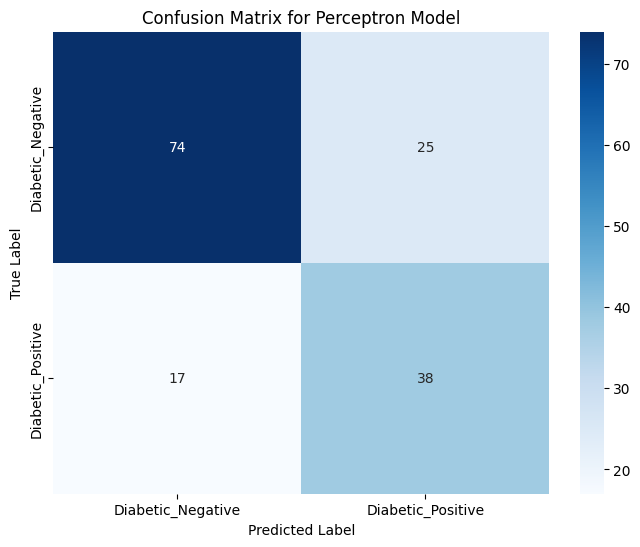

[[74 25]
 [17 38]]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetic_Negative', 'Diabetic_Positive'], yticklabels=['Diabetic_Negative', 'Diabetic_Positive'])
plt.title('Confusion Matrix for Perceptron Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print(conf_matrix)


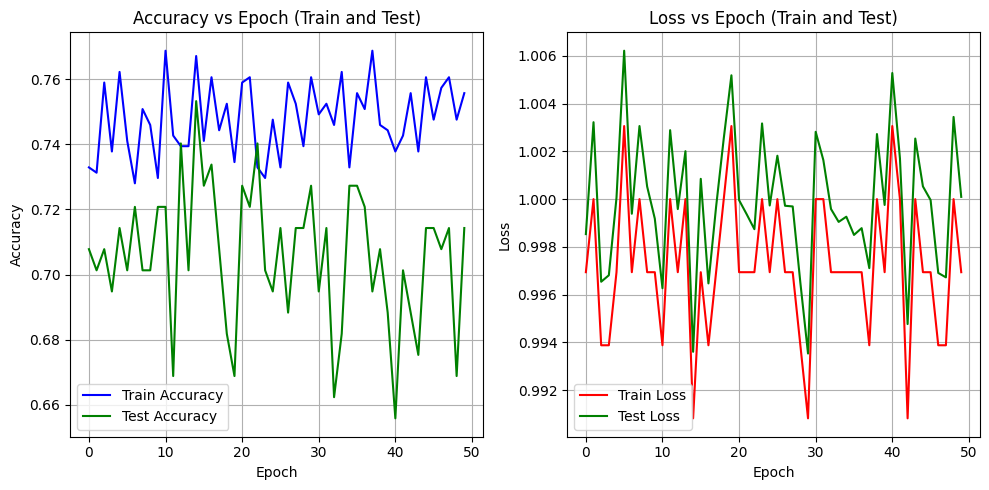

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Handle missing values by imputing with median values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split dataset into features and target
X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lists to store accuracy and loss for training and testing sets
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
train_loss_per_epoch = []
test_loss_per_epoch = []

# Define and manually train the Perceptron model
n_epochs = 50
perceptron = Perceptron(max_iter=1, eta0=0.01, random_state=42, warm_start=True, tol=None)

for epoch in range(n_epochs):
    # Train the Perceptron model
    perceptron.fit(X_train_scaled, y_train)

    # Make predictions on the training and test set
    y_train_pred = perceptron.predict(X_train_scaled)
    y_test_pred = perceptron.predict(X_test_scaled)

    # Calculate accuracy for training and test set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_per_epoch.append(train_accuracy)
    test_accuracy_per_epoch.append(test_accuracy)

    # Calculate hinge loss for training and test set
    y_train_bin = np.where(y_train == 0, -1, 1)  # Convert to -1, 1 for hinge loss calculation
    train_hinge_loss = np.maximum(0, 1 - y_train_bin * (X_train_scaled @ perceptron.coef_.T + perceptron.intercept_)).mean()
    train_loss_per_epoch.append(train_hinge_loss)

    y_test_bin = np.where(y_test == 0, -1, 1)  # Convert to -1, 1 for hinge loss calculation
    test_hinge_loss = np.maximum(0, 1 - y_test_bin * (X_test_scaled @ perceptron.coef_.T + perceptron.intercept_)).mean()
    test_loss_per_epoch.append(test_hinge_loss)

# Plot Accuracy vs Epoch
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_accuracy_per_epoch, label='Train Accuracy', color='b')
plt.plot(range(n_epochs), test_accuracy_per_epoch, label='Test Accuracy', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Train and Test)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), train_loss_per_epoch, label='Train Loss', color='r')
plt.plot(range(n_epochs), test_loss_per_epoch, label='Test Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Train and Test)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()




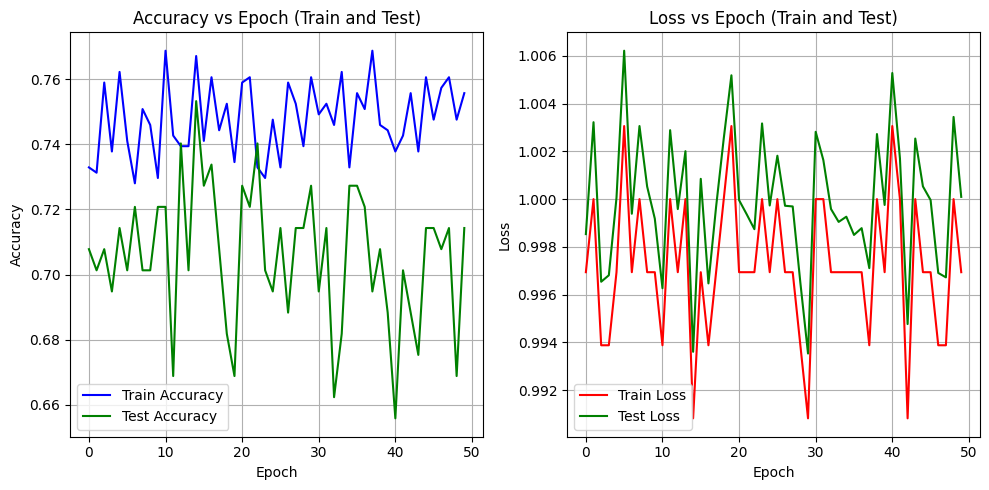

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)


imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
train_loss_per_epoch = []
test_loss_per_epoch = []


n_epochs = 50
perceptron = Perceptron(max_iter=1, eta0=0.01, random_state=42, warm_start=True, tol=None)

for epoch in range(n_epochs):

    perceptron.fit(X_train_scaled, y_train)


    y_train_pred = perceptron.predict(X_train_scaled)
    y_test_pred = perceptron.predict(X_test_scaled)


    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_per_epoch.append(train_accuracy)
    test_accuracy_per_epoch.append(test_accuracy)


    y_train_bin = np.where(y_train == 0, -1, 1)
    train_hinge_loss = np.maximum(0, 1 - y_train_bin * (X_train_scaled @ perceptron.coef_.T + perceptron.intercept_)).mean()
    train_loss_per_epoch.append(train_hinge_loss)

    y_test_bin = np.where(y_test == 0, -1, 1)
    test_hinge_loss = np.maximum(0, 1 - y_test_bin * (X_test_scaled @ perceptron.coef_.T + perceptron.intercept_)).mean()
    test_loss_per_epoch.append(test_hinge_loss)

plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_accuracy_per_epoch, label='Train Accuracy', color='b')
plt.plot(range(n_epochs), test_accuracy_per_epoch, label='Test Accuracy', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Train and Test)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), train_loss_per_epoch, label='Train Loss', color='r')
plt.plot(range(n_epochs), test_loss_per_epoch, label='Test Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Train and Test)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Scale the features (if not already done)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Train the Perceptron model
#perceptron.fit(X_train_scaled, y_train)

# Get the decision function scores
#y_scores = perceptron.decision_function(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_scores' is not defined

In [ ]:
# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

AUC Score: 0.81


In [2]:
# Learnig Rate = 0.00001 and epoc= 1000
# Change learning rate and epoc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer # Import the SimpleImputer class

# Load the dataset (ensure data has been preprocessed)
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Handle missing values by imputing with median values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split dataset into features and target
X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Define and train the Perceptron model with a custom learning rate (eta0)
learning_rate = 0.00001  # Custom learning rate
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Print the learning rate used
print(f"Learning rate (eta0): {learning_rate}")

# Step 2: Make predictions on the test set
y_pred = perceptron.predict(X_test_scaled)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Learning rate (eta0): 1e-05
Model Accuracy: 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [23]:
# Learnig Rate = 0.10 and epoc= 1000
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score


file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)


imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split dataset into features and target
X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Define and train the Perceptron model with a custom learning rate (eta0)
learning_rate = 0.10  # Custom learning rate
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Print the learning rate used
print(f"Learning rate (eta0): {learning_rate}")

# Step 2: Make predictions on the test set
y_pred = perceptron.predict(X_test_scaled)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Learning rate (eta0): 0.1
Model Accuracy: 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [4]:
#Learnig Rate = 0.01 and epoc= 500
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)


imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


learning_rate = 0.01  # Custom learning rate
perceptron = Perceptron(max_iter=500, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)


y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy = test_accuracy  # Model accuracy is the test accuracy
report = classification_report(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy (Model Accuracy): {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Training Accuracy: 74.76%
Test Accuracy (Model Accuracy): 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [5]:
#Learnig Rate = 0.01 and epoc= 1500
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Handle missing values by imputing with median values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split dataset into features and target
X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Define and train the Perceptron model with a custom learning rate (eta0)
learning_rate = 0.01  # Custom learning rate
perceptron = Perceptron(max_iter=1500, tol=1e-3, eta0=learning_rate, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Step 2: Make predictions on both the training and test set
y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)

# Step 3: Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy = test_accuracy  # Model accuracy is the test accuracy
report = classification_report(y_test, y_test_pred)

# Output results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy (Model Accuracy): {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Training Accuracy: 74.76%
Test Accuracy (Model Accuracy): 72.73%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        99
         1.0       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [ ]:
#Compare with Logistic Regression model with L2 regularization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Handle missing values by imputing with median values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split dataset into features and target
X = data_imputed.iloc[:, :-1]  # Features (all columns except the last one)
y = data_imputed.iloc[:, -1]   # Target (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with L2 regularization
# Here, 'C' is the inverse of the regularization strength; smaller values specify stronger regularization.
logistic = LogisticRegression(penalty='l2', C=1.0, random_state=42)

# Train the model
logistic.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = logistic.predict(X_train_scaled)
y_test_pred = logistic.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.7704
Testing Accuracy: 0.7532
Training Confusion Matrix:
[[354  47]
 [ 94 119]]
Testing Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

